## PROJECT 98

### PROJECT NAME: USED CAR PRICE PREDICTION

### GROUP NUMBER: 02

### TEAM MEMBERS: 

* Abhishek P
* Amit Shivshankar Tiwari
* Deepak C N
* Kareem Allaha Mir
* Mohamed Irfan N
* Muhammedh Harun Rasheed
* Rushikesh Gajanan Ghule

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [2]:
car=pd.read_csv('Car.csv')

In [3]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Maruti Suzuki Alto,Maruti,2015,250000,60000,Petrol
1,Honda City 1.5,Honda,2010,240000,40000,Petrol
2,Tata Indigo Marina,Tata,2004,180000,70000,Diesel
3,Mahindra XUV500,Mahindra,2015,1000000,15000,Diesel
4,Mahindra Xylo E8,Mahindra,2009,295000,64000,Diesel


In [4]:
car.shape

(58413, 6)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58413 entries, 0 to 58412
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        58413 non-null  object
 1   company     58413 non-null  object
 2   year        58413 non-null  int64 
 3   Price       58413 non-null  int64 
 4   kms_driven  58413 non-null  int64 
 5   fuel_type   58413 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.7+ MB


In [6]:
car.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

### DUPLICATES

In [7]:
car[car.duplicated()].shape

(23696, 6)

In [8]:
car[car.duplicated()]

,name,company,year,Price,kms_driven,fuel_type
81,Fiat Petra ELX,Fiat,2008,75000,65000,Petrol
94,Hyundai i20 Sportz,Hyundai,2012,100000,55000,Petrol
148,Hyundai i20 Asta,Hyundai,2012,329500,36200,Diesel
173,Mini Cooper S,Mini,2013,1891111,13000,Petrol
190,Skoda Fabia 1.2L,Skoda,2011,159500,38200,Diesel
...,...,...,...,...,...,...
58407,Chevrolet Beat Diesel PS,Chevrolet,2013,245000,51825,Diesel
58408,Maruti Celerio ZXI,Maruti,2017,350000,50000,Petrol
58409,Honda City i VTEC CVT SV,Honda,2015,660000,85118,Petrol
58411,Honda City i VTEC VX,Honda,2015,650000,62000,Petrol


In [9]:
car1=car.drop_duplicates()

In [10]:
car1[car1.duplicated()].shape

(0, 6)

### OUTLIERS

In [11]:
car1.describe()

,year,Price,kms_driven
count,34717.000000,3.471700e+04,34717.000000
mean,2014.780223,6.499468e+05,56394.362157
std,3.075560,7.436823e+05,35146.417201
min,1995.000000,1.000000e+04,1000.000000
25%,2013.000000,3.100000e+05,30000.000000
50%,2015.000000,4.857990e+05,51000.000000
75%,2017.000000,7.150000e+05,74555.000000
max,2021.000000,2.420000e+07,296823.000000


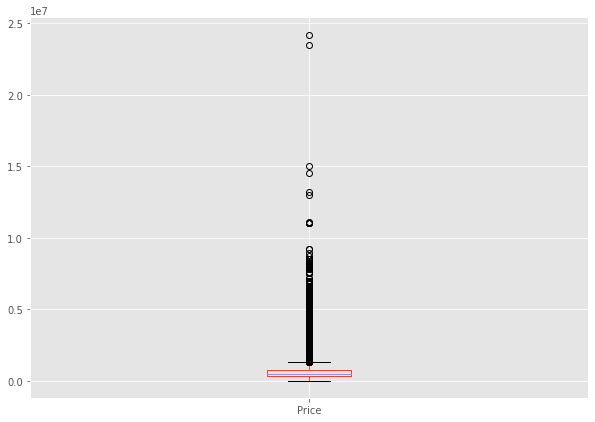

In [12]:
# Box plot for price

plt.figure(figsize=(10,7))
car1.boxplot(column=['Price'])

In [13]:
car1['Price'].describe()

count    3.471700e+04
mean     6.499468e+05
std      7.436823e+05
min      1.000000e+04
25%      3.100000e+05
50%      4.857990e+05
75%      7.150000e+05
max      2.420000e+07
Name: Price, dtype: float64

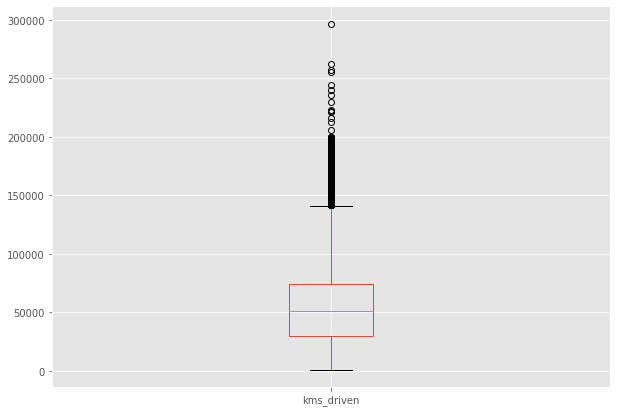

In [14]:
# Box plot of KM Driven

plt.figure(figsize=(10,7))
car1.boxplot(column=['kms_driven'])

In [15]:
car1['kms_driven'].describe()

count     34717.000000
mean      56394.362157
std       35146.417201
min        1000.000000
25%       30000.000000
50%       51000.000000
75%       74555.000000
max      296823.000000
Name: kms_driven, dtype: float64

### VISUALIZATION

In [16]:
import seaborn as sns

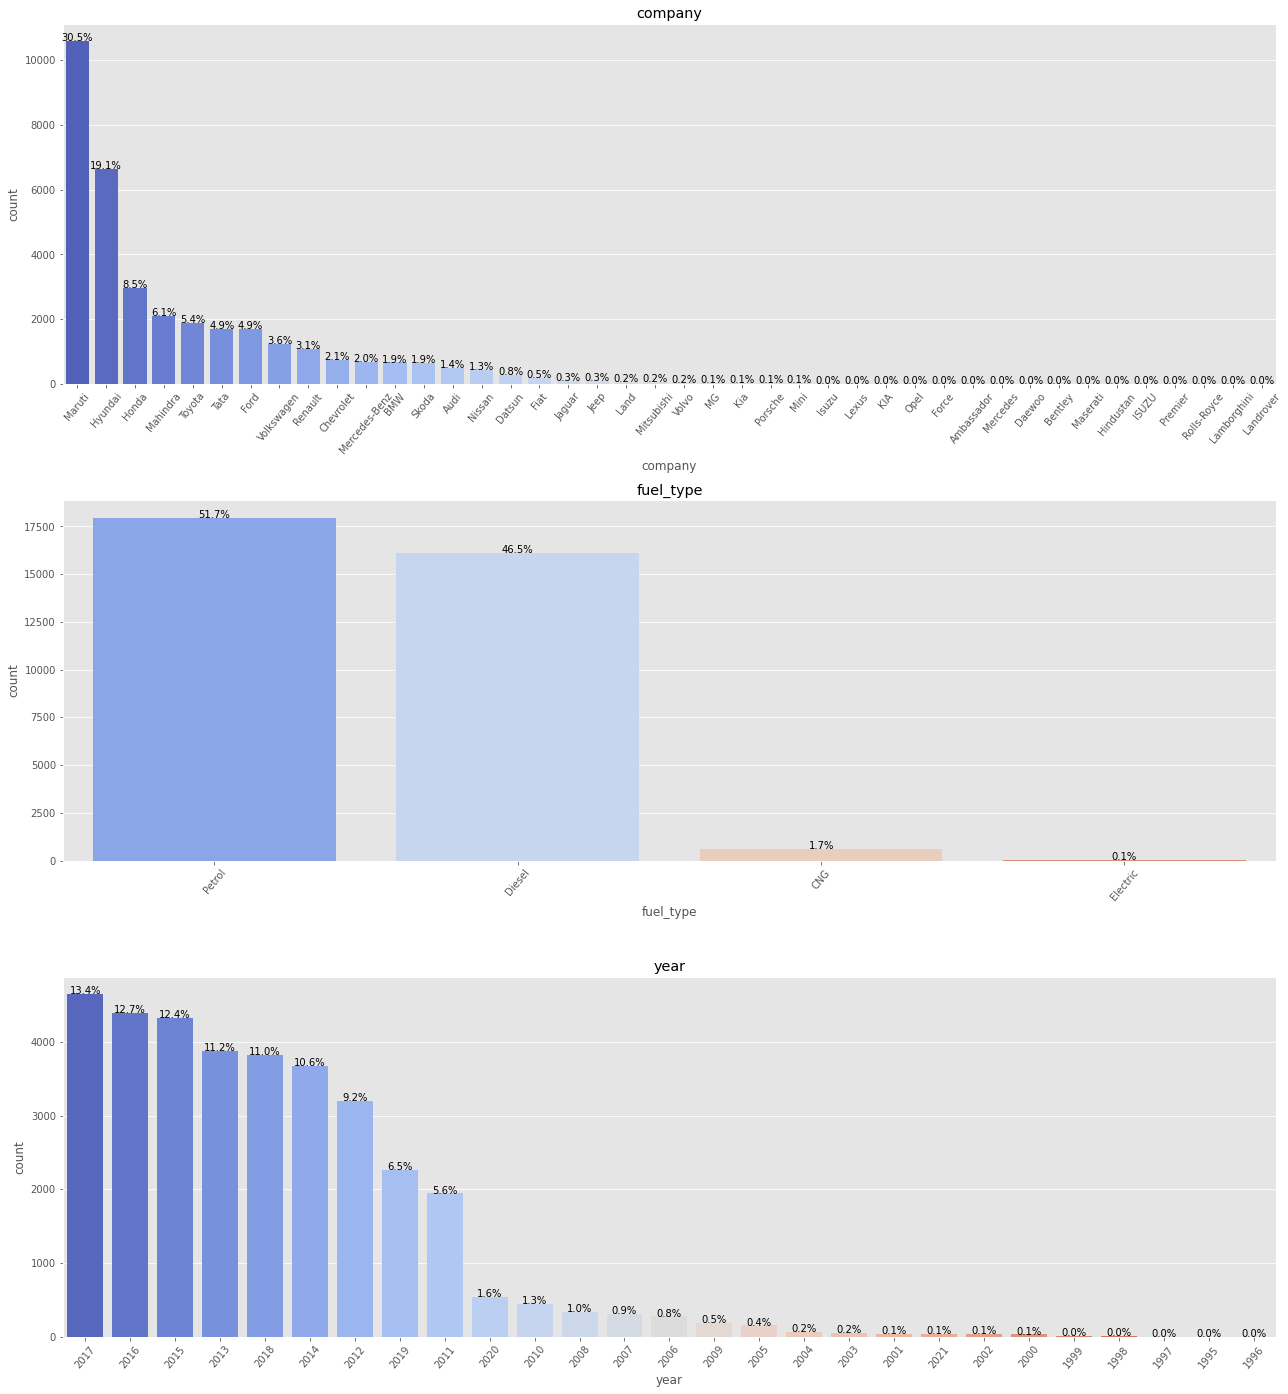

In [17]:
columns=['company', 'fuel_type', 'year'] 

plt.figure(figsize=(18,32))

for i, variable in enumerate(columns):
                     plt.subplot(5,1,i+1)
                     order = car1[variable].value_counts(ascending=False).index    
                     ax=sns.countplot(x=car1[variable], data=car1, order=order, palette='coolwarm')
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(car1[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.00
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.xticks(rotation=50)
                     plt.tight_layout()
                     plt.title(variable)

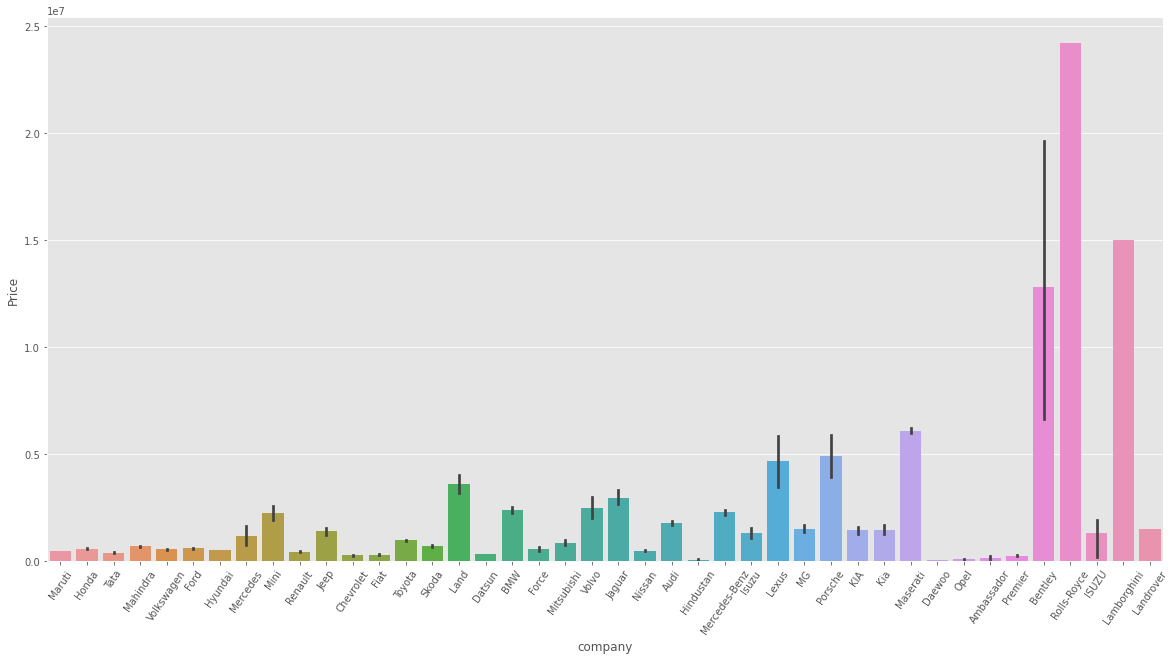

In [18]:
# Relationship between company and Price

f, axes = plt.subplots(figsize=(20,10))
plt.xticks(rotation=55)
sns.barplot(x='company',y='Price',data=car1)

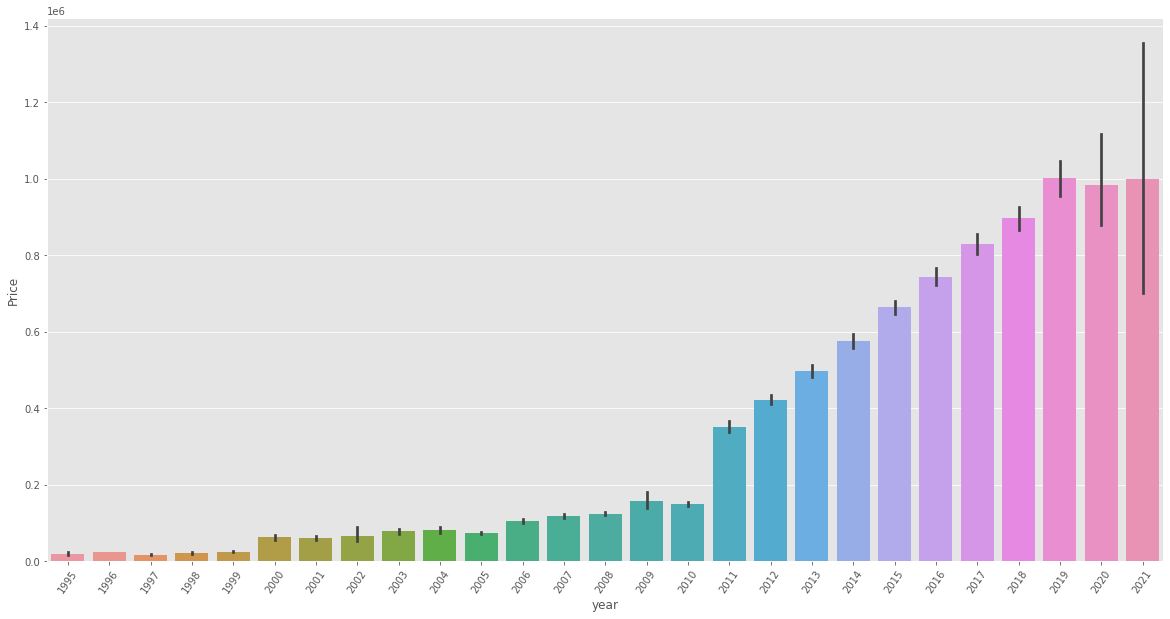

In [19]:
# Relationship between Year and Price

f, axes = plt.subplots(figsize=(20,10))
plt.xticks(rotation=55)
sns.barplot(x='year',y='Price',data=car1)

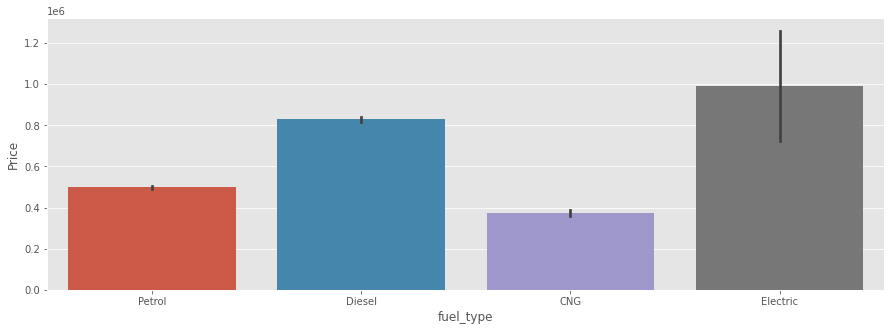

In [20]:
# Relationship between Fuel_Type and Price

f, axes = plt.subplots(figsize=(15,5))
sns.barplot(x='fuel_type',y='Price',data=car1)

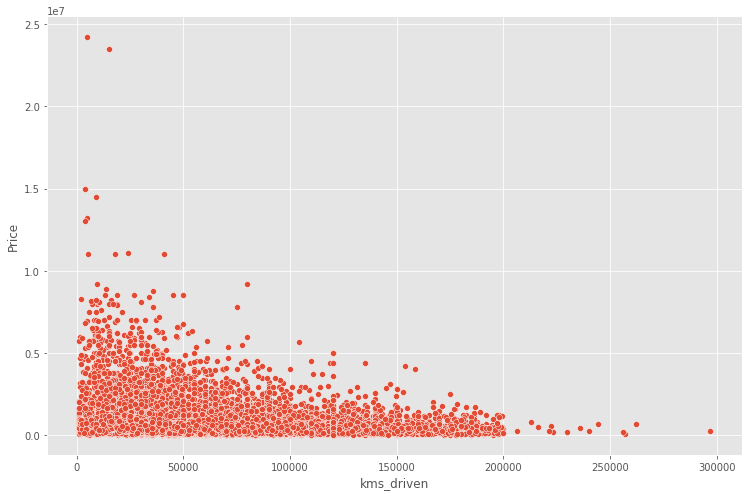

In [21]:
# Relationship between KM_Driven and Price

sns.relplot(x='kms_driven',y='Price',data=car1,height=7,aspect=1.5)

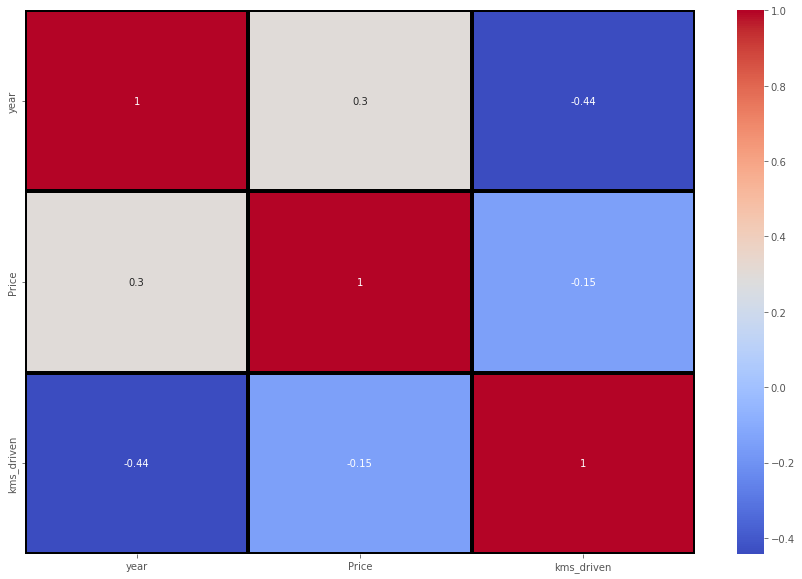

In [22]:
#Correlation matrix

corrMatrix = car1.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corrMatrix, annot=True,cmap= 'coolwarm', linewidths=3, linecolor='black')
plt.show()

### Extracting Training Data

In [23]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [24]:
X

,name,company,year,kms_driven,fuel_type
0,Maruti Suzuki Alto,Maruti,2015,60000,Petrol
1,Honda City 1.5,Honda,2010,40000,Petrol
2,Tata Indigo Marina,Tata,2004,70000,Diesel
3,Mahindra XUV500,Mahindra,2015,15000,Diesel
4,Mahindra Xylo E8,Mahindra,2009,64000,Diesel
...,...,...,...,...,...
58408,Maruti Celerio ZXI,Maruti,2017,50000,Petrol
58409,Honda City i VTEC CVT SV,Honda,2015,85118,Petrol
58410,Maruti Celerio VXI AMT Automatic,Maruti,2016,26344,Petrol
58411,Honda City i VTEC VX,Honda,2015,62000,Petrol


In [25]:
y.shape

(58413,)

### Applying Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

#### Creating an OneHotEncoder object to contain all the possible categories

In [28]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

#### Creating a column transformer to transform categorical columns

In [29]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

#### Linear Regression Model

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr=LinearRegression()

# Making a pipeline
pipe=make_pipeline(column_trans,lr)

# Fitting the  model
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)


# Checking R2 Score
r2_score(y_test,y_pred)

0.8474901196955154

In [32]:
scores=[]
for i in range(300):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))
    

In [33]:
np.argmax(scores)

272

In [34]:
scores[np.argmax(scores)]

0.8936241064105821

### Lasso

In [35]:
from sklearn.linear_model import Lasso

In [40]:
la=Lasso()

# Making a pipeline
pipe=make_pipeline(column_trans, la)

# Fitting the model
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

# Checking R2 Score
r2_score(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 903967106109445.4, tolerance: 2956651939840.7134
  positive,


0.8596375855627878

### Decision Tree Regressor

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
dtr=DecisionTreeRegressor()

# Making a pipeline
pipe=make_pipeline(column_trans, dtr)

# Fitting the model
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

#Checking R2 Score
r2_score(y_test,y_pred)

0.8892598348391976

### RandomForestRegressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rfr=RandomForestRegressor()

# Making a pipeline
pipe=make_pipeline(column_trans, rfr)

# Fitting the model
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

# Checking R2 Score
r2_score(y_test,y_pred)

0.8182899008612667

In [49]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Honda Amaze','Honda',2015,22000,'Petrol']).reshape(1,5)))

array([346839.02])

In [50]:
import pickle
pickle.dump(pipe,open('RegressionModel.pkl','wb'))